# Image Denoising Using Sparse Representation

This notebook is made for visually showing what results can be obtained by running [main.py](https://github.com/ksonod/sparse_representation_based_image_denoising/blob/main/sample/main.py) in the `./sample` directory.  

In the background, random noise is added to an input image. The created noisy image is denoised using sparse representation based on the direct-cosine-transform ([DCT](https://en.wikipedia.org/wiki/Discrete_cosine_transform)) dictionary. Peak signal-to-noise ratio ([PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)) is used to evaluate improvement.

## Import

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from data.degrade_images import degrade_image, DegradationType
from algorithm.dictionary import Dictionary, DictionaryType
from algorithm.sparse_solver import SparseSolver
from algorithm.statistics import calculate_psnr
from sample.main import run_scripts

In [2]:
input_file = {
    "file_path": Path("./data/sample_image/image.png") 
}

## Results
### Without Dictionary Learning

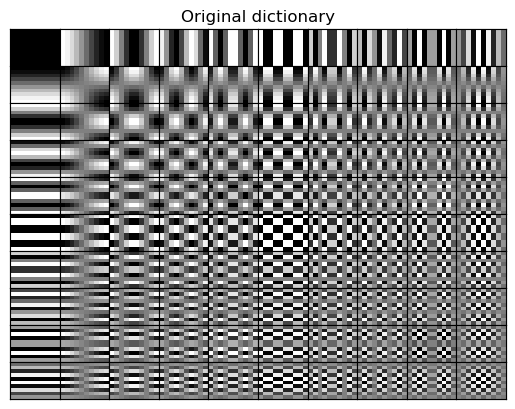

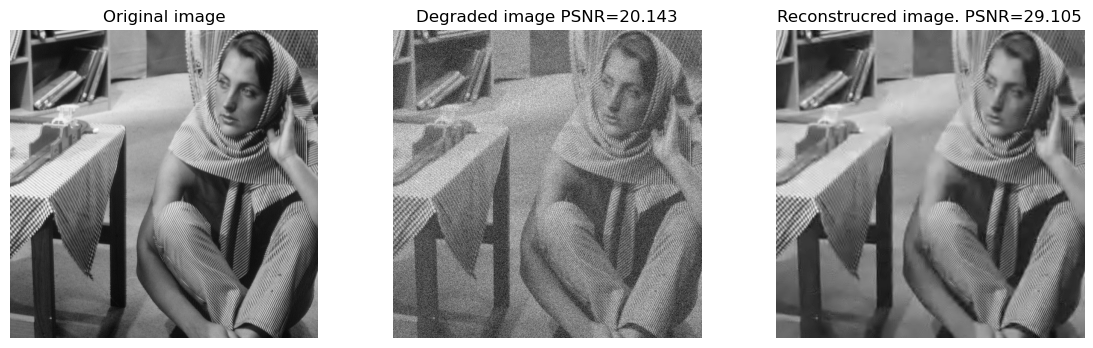

In [3]:
config = {
    "image_degradation": {
        "noise_sigma": 25,
        "random_seed": 41,
        "degradation_type": DegradationType.NOISE
    },
    "sparse_model": {
        "patch_size": (10, 10),  # The patch must be a square
        "initial_dict": DictionaryType.DCT,
        "enable_dictionary_learning": False,  # False means a predefined dictionary will be used.
#         "num_learning_iterations": 30, 
        "verbose": True,
    },
}

run_scripts(input_file, config)

At first, DCT dictionary atoms are visualized. In the next step, three images are visualized:  
- **Left image**: Original image.
- **Middle image**: Noisy image created by adding random noise to the original image.
- **Right image**: Restored image by denoising the noisy image shown in the middle.

Using sparse representation based on DCT dictionary, the noisy image is resotred. In fact, PSNR is improved from 20.143 to 29.105.

### Dictionary Learning

Iteration 1:  Residual error =  644.06 -- Average cardinality =  4.81
Iteration 2:  Residual error =  643.84 -- Average cardinality =  4.70
Iteration 3:  Residual error =  643.65 -- Average cardinality =  4.62
Iteration 4:  Residual error =  643.53 -- Average cardinality =  4.57
Iteration 5:  Residual error =  643.44 -- Average cardinality =  4.53
Iteration 6:  Residual error =  643.43 -- Average cardinality =  4.50
Iteration 7:  Residual error =  643.34 -- Average cardinality =  4.47
Iteration 8:  Residual error =  643.27 -- Average cardinality =  4.46
Iteration 9:  Residual error =  643.23 -- Average cardinality =  4.44
Iteration 10:  Residual error =  643.22 -- Average cardinality =  4.43
Iteration 11:  Residual error =  643.22 -- Average cardinality =  4.41
Iteration 12:  Residual error =  643.19 -- Average cardinality =  4.40
Iteration 13:  Residual error =  643.21 -- Average cardinality =  4.40
Iteration 14:  Residual error =  643.17 -- Average cardinality =  4.39
Iteration 15:  

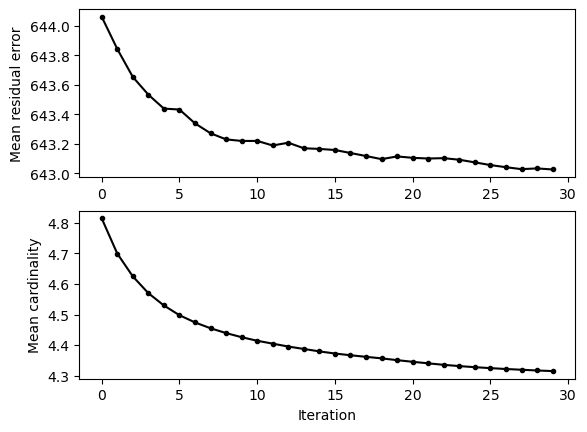

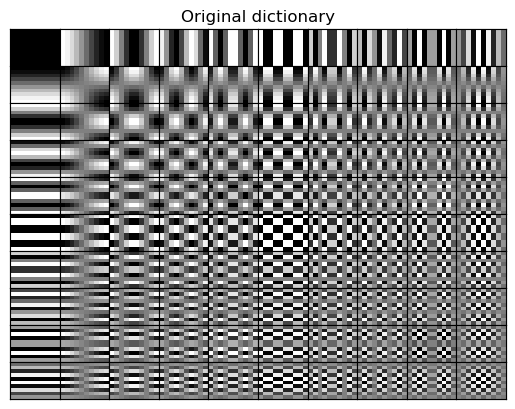

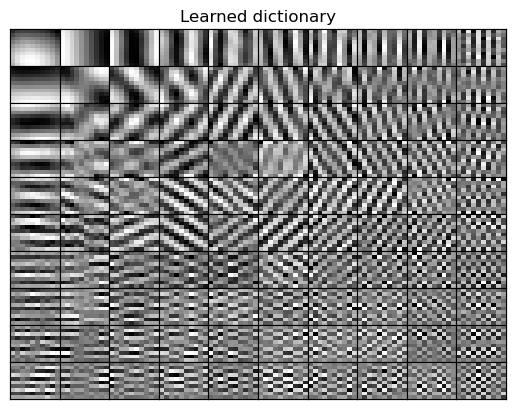

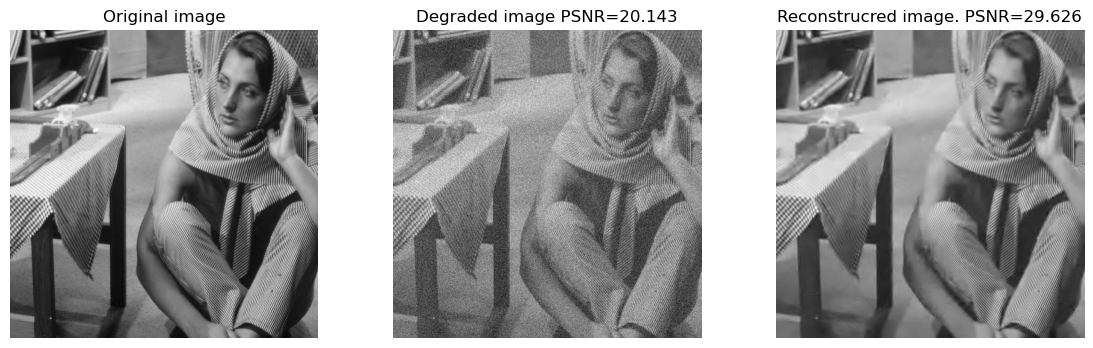

In [4]:
config["sparse_model"] = {
    "patch_size": (10, 10),  # The patch must be a square
    "initial_dict": DictionaryType.DCT,
    "enable_dictionary_learning": True,  # True means the initial DCT-based dictionary will be updated.
    "num_learning_iterations": 30,  # number of learning iterations
    "verbose": True,
}


run_scripts(input_file, config)

At the number of iteration increases, the mean residual error and cardinality (i.e., number of non-zero elements) decrease more. The first outcome of this iteration is an updated dictionary which is shown above. It looks slightly different from the original DCT dictionary.  
  
In the next step, three images are visualized:  
- **Left image**: Original image.
- **Middle image**: Noisy image created by adding random noise to the original image.
- **Right image**: Restored image by denoising the noisy image shown in the middle.

Using sparse representation based on the learned DCT dictionary, the noisy image is resotred. In fact, PSNR is improved from 20.143 to 29.626.